In [1]:
import mne
import matplotlib.pyplot as plt
%matplotlib inline

fname = 'oddball-epo.fif' # from mne_preprocessing notebook

epochs = mne.read_epochs(fname)

Reading C:\Users\eraym\Desktop\oddball-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


In [2]:
# Evoked
target = epochs['target'].average()
target

<Evoked | 'target/stimulus' (average, N=106), -0.2 – 0.5 sec, baseline -0.2 – 0 sec, 63 ch, ~102 kB>

In [3]:
standard = epochs['standard'].average()

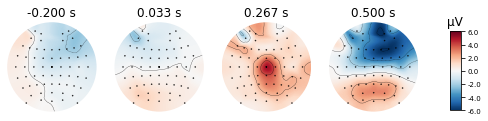

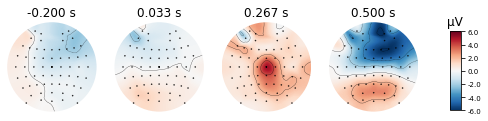

In [4]:
# Examine evoked activity
target.plot_topomap()

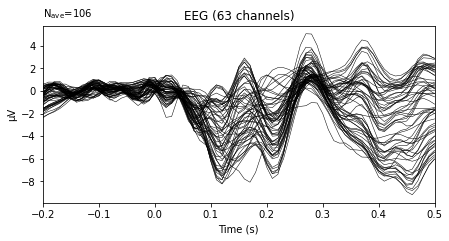

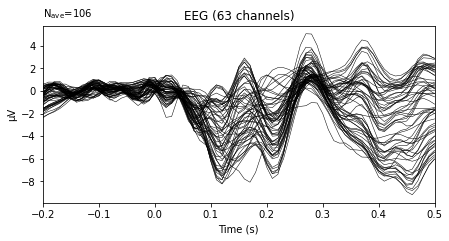

In [5]:
target.plot(time_unit='s', exclude=[])

No projector specified for this dataset. Please consider the method self.add_proj.


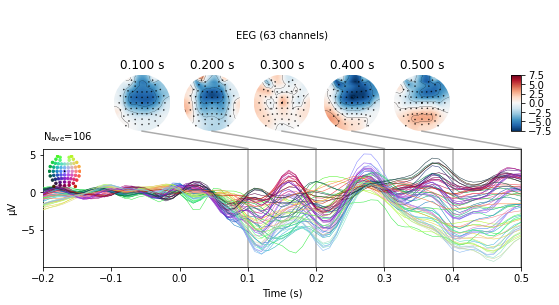

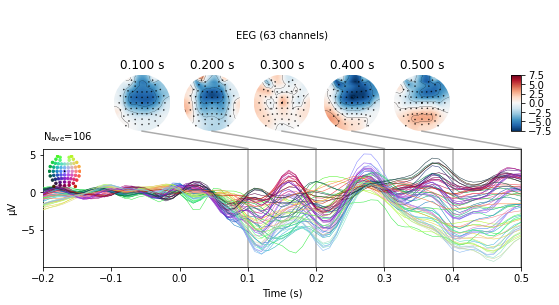

In [6]:
target.plot_joint(times = [0.1, 0.2, .3, .4, .5])

No projector specified for this dataset. Please consider the method self.add_proj.


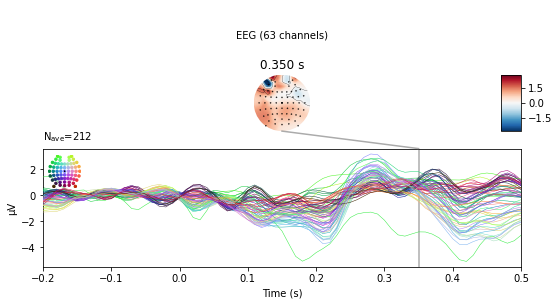

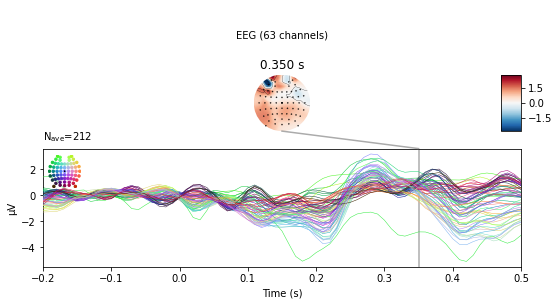

In [7]:
# For condition contrasts
diff = mne.combine_evoked((target, -standard), weights='equal')
diff.plot_joint(times=.35)

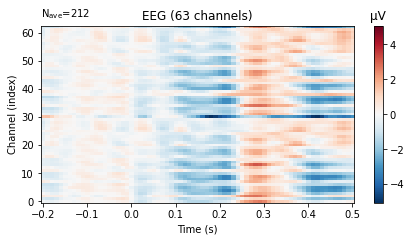

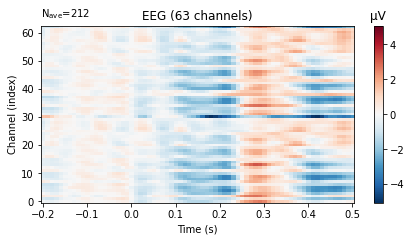

In [8]:
diff.plot_image()

In [9]:
# Because we have a 10/20 electrode layout, we can easily use a nicer layout
rois = mne.channels.make_1020_channel_selections(diff.info, midline='z12')
diff.plot_image(group_by=rois, show=False, show_names='all')

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

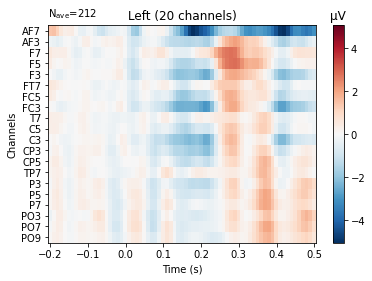

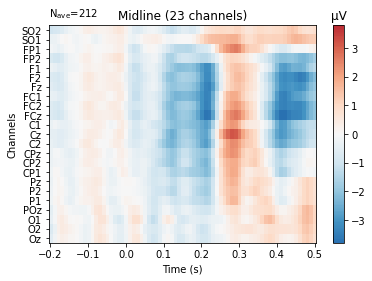

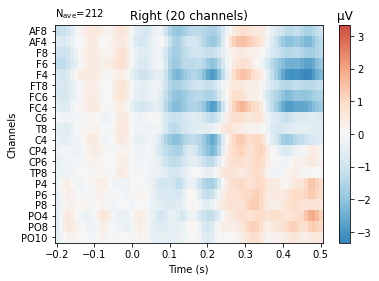

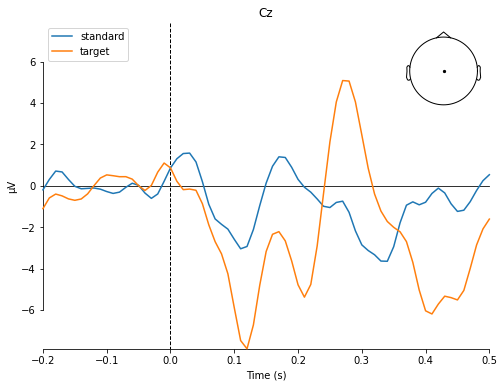

[<Figure size 576x432 with 2 Axes>]

In [10]:
# To contrast multiple conditions
mne.viz.plot_compare_evokeds({'standard': standard,
                             'target': target}, picks=[13])

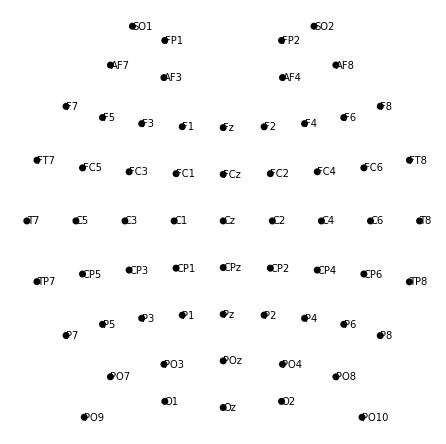

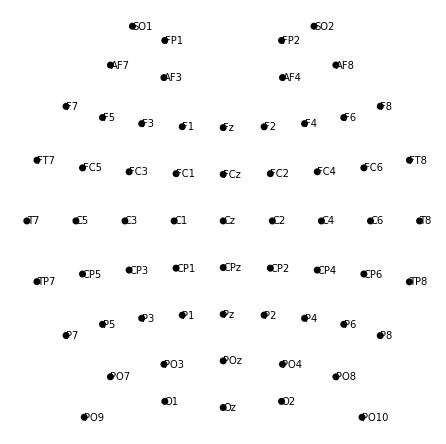

In [11]:
target.plot_sensors(show_names=True)

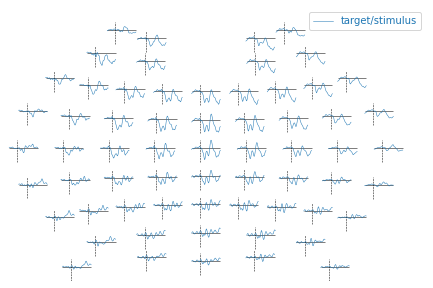

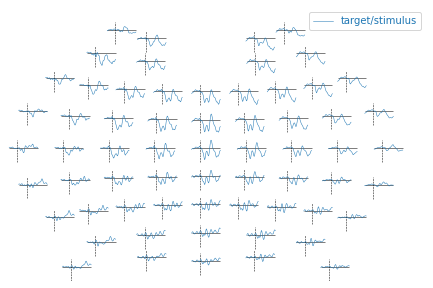

In [12]:
target.plot_topo()

In [13]:
x = target.data
ch_names = target.info['ch_names']

In [14]:
channel = 'C4'
chIndex = [i for i, j in enumerate(ch_names) if j==channel]

In [15]:
plt.plot(x[chIndex[0],:])
plt.title(channel)
plt.ylabel('Amplitude')
plt.xlabel('Time Samples')

Text(0.5, 0, 'Time Samples')

In [16]:
## Time Frequency Analysis
# Overview of the spectral shape of data
epochs_for_tfr = mne.read_epochs('oddball-long-epo.fif')

Reading C:\Users\eraym\Desktop\oddball-long-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


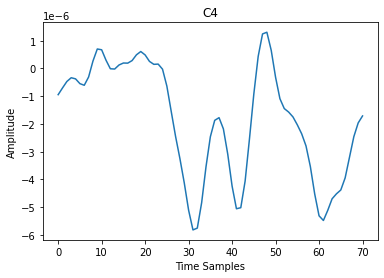

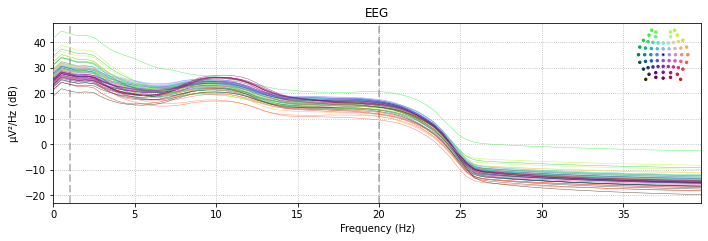

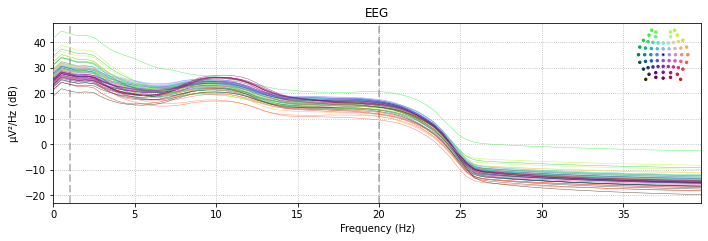

In [17]:
epochs_for_tfr.plot_psd(fmin=0, fmax=40)

In [18]:
# What about time/freq correlates of the oddball effect
# Extract power per time and freq with Morlet wavelets
from mne.time_frequency import tfr_morlet

In [ ]:
freqs        = list(range(3,30))
tfr_target   = tfr_morlet(epochs_for_tfr['target'], freqs,3,return_itc=False)
tfr_standard = tfr_morlet(epochs_for_tfr['standard'], freqs,3,return_itc=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


In [ ]:
tfr_contrast = mne.combine_evoked((tfr_standard, tfr_target), (-.5, .5))
tfr_contrast.apply_baseline((None,0))

In [ ]:
# Plot time-freq activity (event-related specral perturbations)
# Observe the alpha-band ERD and correlation with P3 effect
tfr_contrast.plot_joint()

In [ ]:
tfr_contrast.plot(picks=[27])